## ROC - Receiver Operating Characteristic
Performance metric for binary classification.



### Terminology:
- **True Positive Rate (Sensitivity, also called Recall):** TP / (TP + FN)

- **False Positive Rate (1-Specificity):** FP / (FP + TN)


In [1]:
import numpy                 as np
import matplotlib.pyplot     as plt
from sklearn.datasets        import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_curve, auc

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [4]:
# Predict probabilities on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [5]:
roc_auc

0.9141713014460511

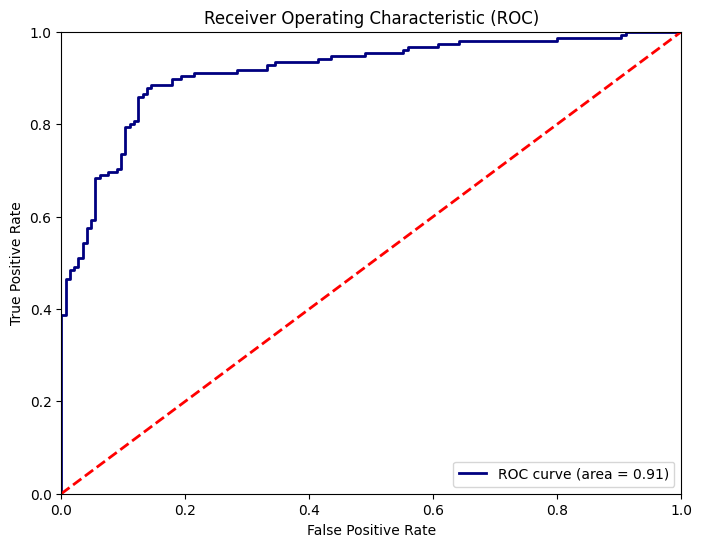

In [6]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [7]:
threshold = 0.4

y_pred = (classifier.predict_proba(X_test)[:,1] >= threshold).astype(bool)